# Test Jarvis Patrick and SNN methods

In [1]:
import numpy as np
import scipy as sp
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import seaborn as sb

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import mymetrics
import jp
%autoreload 2

## 1. JP: simple 2D

Basic Jarvis Patrick method. See Jarvis, R. A.; Patrick, E. A. Clustering Using a Similarity Measure Based on Shared Nearest Neighbors IEEE Trans. Comput. 1973, C22, 1025-1034.

Calculate the set of $K$ nearest neighbors for each structure. Note that the structure is set as its $0^{th}$ neighbor. Two structures cluster together if:
- they are in each others list of nearest neighbors
- they have at least $K_{min}$ of their $K$ nearest neighbors in common.

In [3]:
Xsimple = np.array((\
    (1,1),\
    (4,1),(5,2),(4.5,2.5),\
    (6,6),\
    (1,5),(1.5,6),(2,6.5)\
))

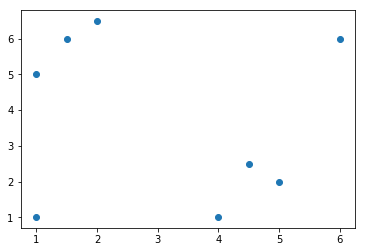

In [4]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [5]:
my_estimator = jp.jarvis_patrick(K=3,Kmin=2,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]


(3, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

In [6]:
my_estimator.A[4,1]=0
my_estimator.A[1,4]=0
my_estimator.A

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1]])

In [7]:
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple,do_conn=False)
ncl, nn, cl

Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]


(3, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

## 2 JP: 2D blobs, circles, moons

In [8]:
np.random.seed(0)
n_samples = 1500

nexample = 4
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons   = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs         = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure  = np.random.rand(n_samples, 2), None
#
DATA = list((noisy_circles,noisy_moons,blobs,no_structure))
for i in DATA:
    print(i[0].shape)

(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)


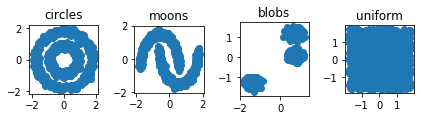

In [9]:
titles = ("circles","moons","blobs","uniform")
fig, axs = plt.subplots(1, 4)
for i in range(nexample):
    data = sklearn.preprocessing.StandardScaler().fit_transform(DATA[i][0])
    x = data[:,0]
    y = data[:,1]
    axs[i].scatter(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_aspect('equal', 'box')
    DATA[i] = data
fig.tight_layout()

### 2.1 circles

In [10]:
X = DATA[0]
my_estimator = jp.jarvis_patrick(K=20,Kmin=3,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

Ad. matrix
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


(3, 1, array([0, 0, 8, ..., 8, 0, 0]))

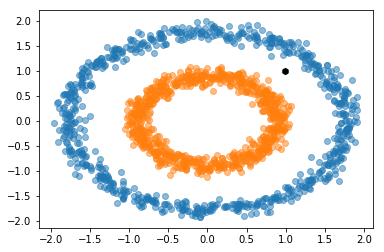

In [11]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

### 2.2 moons

In [12]:
X = DATA[1]
my_estimator = jp.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(3, 1, array([ 0, 16, 16, ...,  0,  0,  0]))

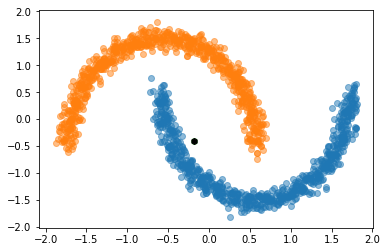

In [13]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 2.3 blobs

In [14]:
X = DATA[2]
my_estimator = jp.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(4, 1, array([8, 8, 8, ..., 8, 9, 9]))

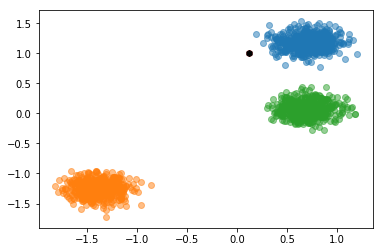

In [15]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 2.4 uniform

In [16]:
X = DATA[3]
my_estimator = jp.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(1, 0, array([8, 8, 8, ..., 8, 8, 8]))

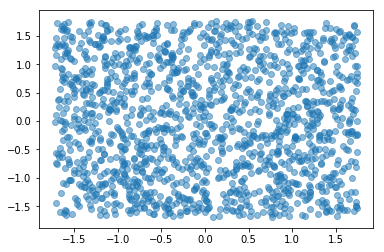

In [17]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

## 3.0 JP variant

see Brown and Martin (Brown, R. D.; Martin. Y. C. Use of Structure-Activity Data To Compare Structure-Based Clustering Methods and Descriptors for Use in Compound Selection J. Chem. Inf. Comput. Sci. 1996, 36, 572-584); the original algorithm has the following shortcomings:

- nearest neighbors of equal similarity to others already in the list maybe excluded because the list already has K elements; this may subdivide large clusters consisting similar molecules.
- it has the tendency to produce too many singletons, because in many cases similar structures have less than Kmin nearest neighbors in common.

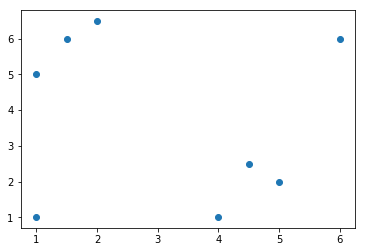

In [18]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [19]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xsimple))
D

array([[0.        , 3.        , 4.12310563, 3.80788655, 7.07106781,
        4.        , 5.02493781, 5.59016994],
       [3.        , 0.        , 1.41421356, 1.58113883, 5.38516481,
        5.        , 5.59016994, 5.85234996],
       [4.12310563, 1.41421356, 0.        , 0.70710678, 4.12310563,
        5.        , 5.31507291, 5.40832691],
       [3.80788655, 1.58113883, 0.70710678, 0.        , 3.80788655,
        4.30116263, 4.60977223, 4.71699057],
       [7.07106781, 5.38516481, 4.12310563, 3.80788655, 0.        ,
        5.09901951, 4.5       , 4.03112887],
       [4.        , 5.        , 5.        , 4.30116263, 5.09901951,
        0.        , 1.11803399, 1.80277564],
       [5.02493781, 5.59016994, 5.31507291, 4.60977223, 4.5       ,
        1.11803399, 0.        , 0.70710678],
       [5.59016994, 5.85234996, 5.40832691, 4.71699057, 4.03112887,
        1.80277564, 0.70710678, 0.        ]])

In [20]:
my_estimator = jp.brown_martin(T=2.,Rmin=0.5,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

[array([0]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([4]), array([5, 6, 7]), array([5, 6, 7]), array([5, 6, 7])]
Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]


(3, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

### 3.1 circles

In [21]:
X = DATA[0]

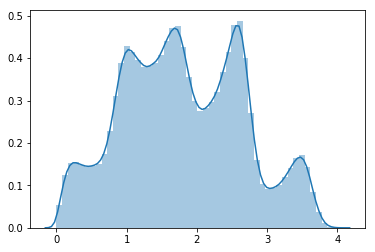

In [22]:
sb.distplot(sp.spatial.distance.pdist(X))

In [23]:
my_estimator = jp.brown_martin(T=0.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 0, array([0, 0, 2, ..., 2, 0, 0]))

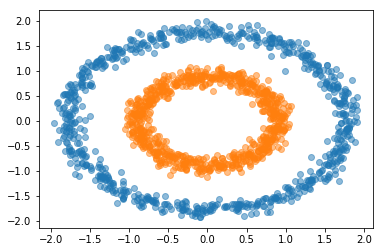

In [24]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.2 moons

In [25]:
X = DATA[1]
my_estimator = jp.brown_martin(T=0.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 0, array([0, 1, 1, ..., 0, 0, 0]))

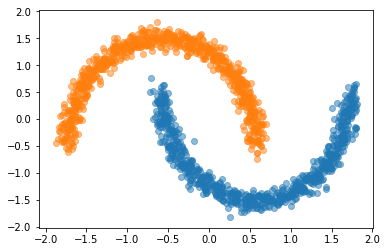

In [26]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.3 blobs

In [27]:
X = DATA[2]
my_estimator = jp.brown_martin(T=.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(3, 0, array([0, 0, 0, ..., 0, 2, 2]))

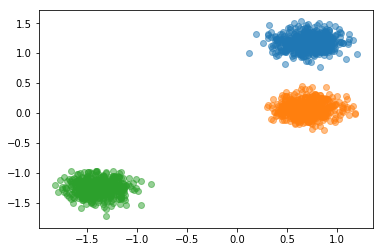

In [28]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.4 uniform

In [29]:
X = DATA[3]
my_estimator = jp.brown_martin(T=.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(1, 0, array([0, 0, 0, ..., 0, 0, 0]))

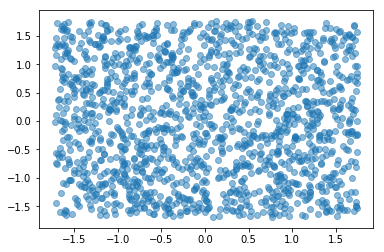

In [30]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        